In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
policeShootings = pd.read_csv('policeshootings.csv')
policeShootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


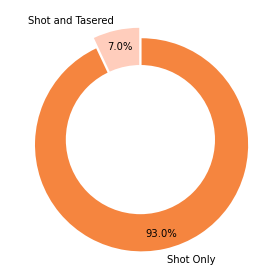

In [28]:
shotTasered = policeShootings[policeShootings['manner_of_death'] == 'shot and Tasered']
shotOnly = policeShootings[policeShootings['manner_of_death'] == 'shot']

deathTypeCount = [shotTasered['manner_of_death'].count(), shotOnly['manner_of_death'].count()]

# Pie chart
labels = ['Shot and Tasered', 'Shot Only']

#colors
colors = ['#FFCDBC','#F5853F']

#explsion
explode = (0.05,0.05)
 
plt.pie(deathTypeCount, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

#### Bar Graph Showing Most Used Weapons When Being Killed by Police 

<AxesSubplot:title={'center':'Weapon When Killed'}, xlabel='Weapon', ylabel='Total'>

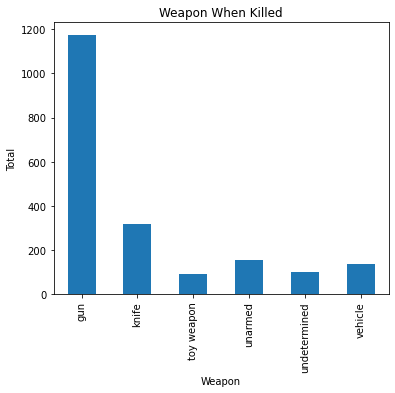

In [98]:
# Grouping Weapons to get the Count
weaponCounts = policeShootings.groupby(['armed'])['id'].count()

# Filtering for Most Used Weapons 
importantWeaponCounts = weaponCounts[weaponCounts > 25]

# Draw Graph
importantWeaponCounts.plot(kind='bar', title='Weapon When Killed', ylabel='Total',
         xlabel='Weapon', figsize=(6, 5))

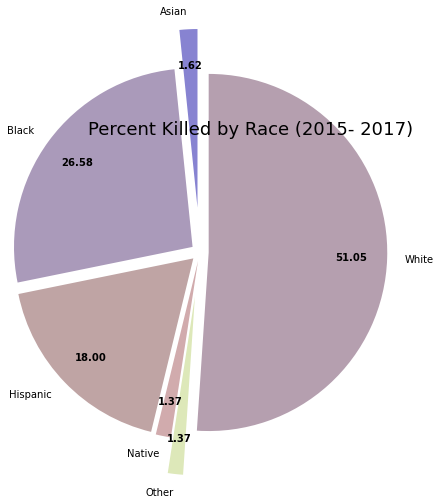

In [239]:
raceGender = policeShootings.groupby(['race', 'gender']).count()

asian = raceGender['id']['A'].sum()
black = raceGender['id']['B'].sum()
hispanic = raceGender['id']['H'].sum()
native = raceGender['id']['N'].sum()
other = raceGender['id']['O'].sum()
white = raceGender['id']['W'].sum()

# Data to plot
labels = ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'White']

sizes = [asian, black, hispanic, native, other, white]

colors = ['#8783D1', '#AA9ABA', '#BFA4A4', '#D1ABAD', '#DDE8B9', '#B59FAF']

explode = (0.5,0.1,0.1,0.1, 0.5,0.1) 
               
#Plot
fig, ax = plt.subplots(figsize=(4, 6))

patches, texts, pcts = plt.pie(sizes, pctdistance=0.8, labels=labels, colors=colors, startangle=90, explode=explode,radius=2, autopct='%.2f')

# Style just the percent values.
plt.setp(pcts, color='black', fontweight='bold')
ax.set_title('Percent Killed by Race (2015- 2017)', loc='left', color = 'black', fontsize=18)


plt.show()

gender  signs_of_mental_illness
M       False                      1557
        True                        495
F       False                        54
        True                         35
dtype: int64


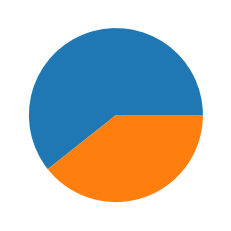

TypeError: pie() got an unexpected keyword argument 'title'

In [292]:
mentalIll = policeShootings[['gender', 'signs_of_mental_illness']].value_counts()
print(mentalIll)

mentalIllMen = [mentalIll[0], mentalIll[1]]
mentalIllWomen = [mentalIll[2], mentalIll[3]]

plt.pie(mentalIllWomen)
plt.show()


plt.pie(mentalIllMen, title= 'Men', labels=['No Mental Illness', 'Mental Illness'], autopct="%.1f%%")
plt.show()